In [1]:
!pip install pandas pyarrow fastparquet

In [4]:
import pandas as pd
import json

In [5]:
df = pd.read_parquet("src/data/data.parquet")


In [6]:
import json
print(json.dumps(df.iloc[0].to_dict(), indent=2))


{
  "label": 1.0,
  "id": "08f391ab10c7114d033517ea0e3905a9",
  "base_id": "562949956772225",
  "sources": "[{\"property\":\"\",\"dataset\":\"meta\",\"record_id\":\"112012623717552\",\"update_time\":\"2025-01-06T00:00:00.000Z\"},{\"property\":\"/properties/existence\",\"dataset\":\"msft\",\"record_id\":\"562949956772225\",\"update_time\":\"2025-01-06T00:00:00.000Z\"},{\"property\":\"/properties/existence\",\"dataset\":\"msft\",\"record_id\":\"1407374887928990\",\"update_time\":\"2025-01-06T00:00:00.000Z\"}]",
  "names": "{\"primary\":\"BP\"}",
  "categories": "{\"primary\":\"gas_station\",\"alternate\":[\"energy_company\",\"bar\"]}",
  "confidence": 0.9962614185921548,
  "websites": "[\"https://map.bp.com/es-ES/ES/estacion-de-servicio/los-barrios/e-s-bp-la-montera/1023746243\"]",
  "socials": "[\"https://www.facebook.com/112012623717552\"]",
  "emails": null,
  "phones": "[\"+34956621050\"]",
  "brand": "{\"names\":{\"primary\":\"bp\"}}",
  "addresses": "[{\"freeform\":\"Avenida Carlos

In [4]:
df.head()       # Show first 5 rows
df.info()       # Summary of columns and data types
df.describe()   # Statistical summary of numeric columns
df.shape        # Number of rows and columns
df.columns      # Column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            3000 non-null   float64
 1   id               3000 non-null   object 
 2   base_id          3000 non-null   object 
 3   sources          3000 non-null   object 
 4   names            3000 non-null   object 
 5   categories       2957 non-null   object 
 6   confidence       3000 non-null   float64
 7   websites         2459 non-null   object 
 8   socials          2090 non-null   object 
 9   emails           0 non-null      object 
 10  phones           2765 non-null   object 
 11  brand            884 non-null    object 
 12  addresses        3000 non-null   object 
 13  base_sources     3000 non-null   object 
 14  base_names       3000 non-null   object 
 15  base_categories  2960 non-null   object 
 16  base_confidence  3000 non-null   float64
 17  base_websites 

Index(['label', 'id', 'base_id', 'sources', 'names', 'categories',
       'confidence', 'websites', 'socials', 'emails', 'phones', 'brand',
       'addresses', 'base_sources', 'base_names', 'base_categories',
       'base_confidence', 'base_websites', 'base_socials', 'base_emails',
       'base_phones', 'base_brand', 'base_addresses'],
      dtype='object')

In [7]:
# df["addresses"].head(5) #see what kind of data is in the addesses column
df.head(5).to_dict(orient="records")

[{'label': 1.0,
  'id': '08f391ab10c7114d033517ea0e3905a9',
  'base_id': '562949956772225',
  'sources': '[{"property":"","dataset":"meta","record_id":"112012623717552","update_time":"2025-01-06T00:00:00.000Z"},{"property":"/properties/existence","dataset":"msft","record_id":"562949956772225","update_time":"2025-01-06T00:00:00.000Z"},{"property":"/properties/existence","dataset":"msft","record_id":"1407374887928990","update_time":"2025-01-06T00:00:00.000Z"}]',
  'names': '{"primary":"BP"}',
  'categories': '{"primary":"gas_station","alternate":["energy_company","bar"]}',
  'confidence': 0.9962614185921548,
  'websites': '["https://map.bp.com/es-ES/ES/estacion-de-servicio/los-barrios/e-s-bp-la-montera/1023746243"]',
  'socials': '["https://www.facebook.com/112012623717552"]',
  'emails': None,
  'phones': '["+34956621050"]',
  'brand': '{"names":{"primary":"bp"}}',
  'addresses': '[{"freeform":"Avenida Carlos Cano","locality":"Los Barrios","postcode":"11370","country":"ES"}]',
  'base_s

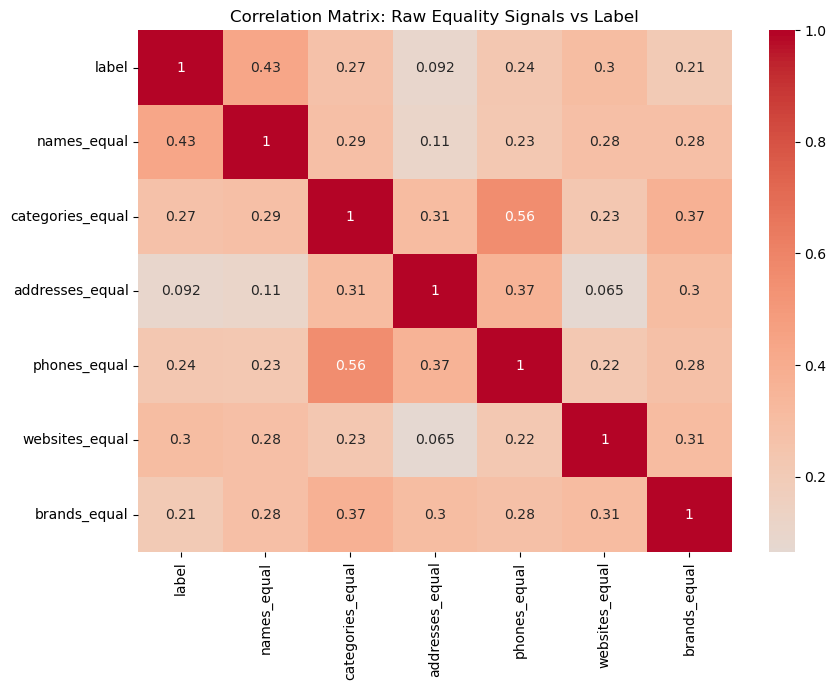

,label,names_equal,categories_equal,addresses_equal,phones_equal,websites_equal,brands_equal
label,1.000000,0.430609,0.271570,0.092138,0.236512,0.302998,0.209879
names_equal,0.430609,1.000000,0.286187,0.105062,0.229368,0.281401,0.284913
categories_equal,0.271570,0.286187,1.000000,0.313387,0.555450,0.232075,0.372674
addresses_equal,0.092138,0.105062,0.313387,1.000000,0.365399,0.065234,0.302825
phones_equal,0.236512,0.229368,0.555450,0.365399,1.000000,0.222298,0.277285
websites_equal,0.302998,0.281401,0.232075,0.065234,0.222298,1.000000,0.312267
brands_equal,0.209879,0.284913,0.372674,0.302825,0.277285,0.312267,1.000000


In [9]:
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse

# Load original dataset
df = pd.read_parquet("src/data/data.parquet")

# -------------------------------
# Helper: load JSON safely
# -------------------------------
def safe_json(x):
    try:
        return json.loads(x) if isinstance(x, str) else x
    except:
        return None

# -------------------------------
# Raw similarity functions (STRICT)
# -------------------------------

def strict_equal(a, b):
    """Checks if raw strings are exactly equal."""
    return 1 if a == b else 0

def primary_equal(a, b):
    """Check if JSON primary strings match exactly."""
    a1 = safe_json(a)
    b1 = safe_json(b)
    if isinstance(a1, dict) and isinstance(b1, dict):
        return 1 if a1.get("primary","") == b1.get("primary","") else 0
    return 0

def list_equal(a, b):
    a1 = safe_json(a)
    b1 = safe_json(b)
    return 1 if a1 == b1 and a1 is not None else 0

def phone_equal(a, b):
    """Raw phone digit equality."""
    def normalize(p):
        if p is None:
            return None
        arr = safe_json(p)
        if isinstance(arr, list) and arr:
            p = arr[0]
        return re.sub(r"\D","", p or "")
    pa = normalize(a)
    pb = normalize(b)
    return 1 if pa and pb and pa == pb else 0

def domain_equal(a, b):
    """Extract domain and compare."""
    def domain(x):
        arr = safe_json(x)
        if isinstance(arr,list) and arr:
            try:
                return urlparse(arr[0]).netloc.replace("www.","").lower()
            except:
                return None
        return None
    return 1 if domain(a) and domain(a) == domain(b) else 0

# -------------------------------
# Build numeric feature DataFrame
# -------------------------------

df_raw = pd.DataFrame({
    "label": df["label"],

    # Direct equality signals
    "names_equal": df.apply(lambda r: primary_equal(r["names"], r["base_names"]), axis=1),
    "categories_equal": df.apply(lambda r: primary_equal(r["categories"], r["base_categories"]), axis=1),
    "addresses_equal": df.apply(lambda r: strict_equal(r["addresses"], r["base_addresses"]), axis=1),
    "phones_equal": df.apply(lambda r: phone_equal(r["phones"], r["base_phones"]), axis=1),
    "websites_equal": df.apply(lambda r: domain_equal(r["websites"], r["base_websites"]), axis=1),
    "brands_equal": df.apply(lambda r: primary_equal(r["brand"], r["base_brand"]), axis=1),
})

# Compute correlation matrix
corr = df_raw.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Raw Equality Signals vs Label")
plt.tight_layout()
plt.show()

corr


Feature Importances (Logistic Regression):
names_equal         1.009178
websites_equal      0.422274
categories_equal    0.330336
phones_equal        0.273820
addresses_equal     0.022331
brands_equal        0.009042
dtype: float64


<Axes: title={'center': 'Feature Importance (LogReg)'}>

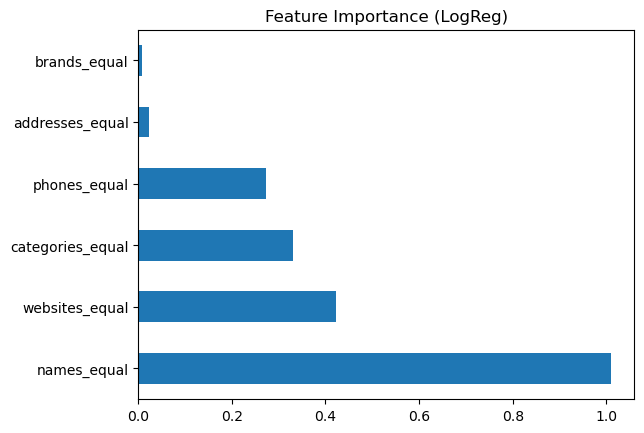

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# df_raw must already contain the fields:
# names_equal, categories_equal, addresses_equal, phones_equal, websites_equal, brands_equal, label

X = df_raw.drop(columns=["label"])
y = df_raw["label"]

# Scale features (helps interpret weights)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression
clf = LogisticRegression()
clf.fit(X_scaled, y)

# Feature importance = absolute value of coefficient
importance = pd.Series(abs(clf.coef_[0]), index=X.columns).sort_values(ascending=False)

print("Feature Importances (Logistic Regression):")
print(importance)

importance.plot(kind="barh", title="Feature Importance (LogReg)")


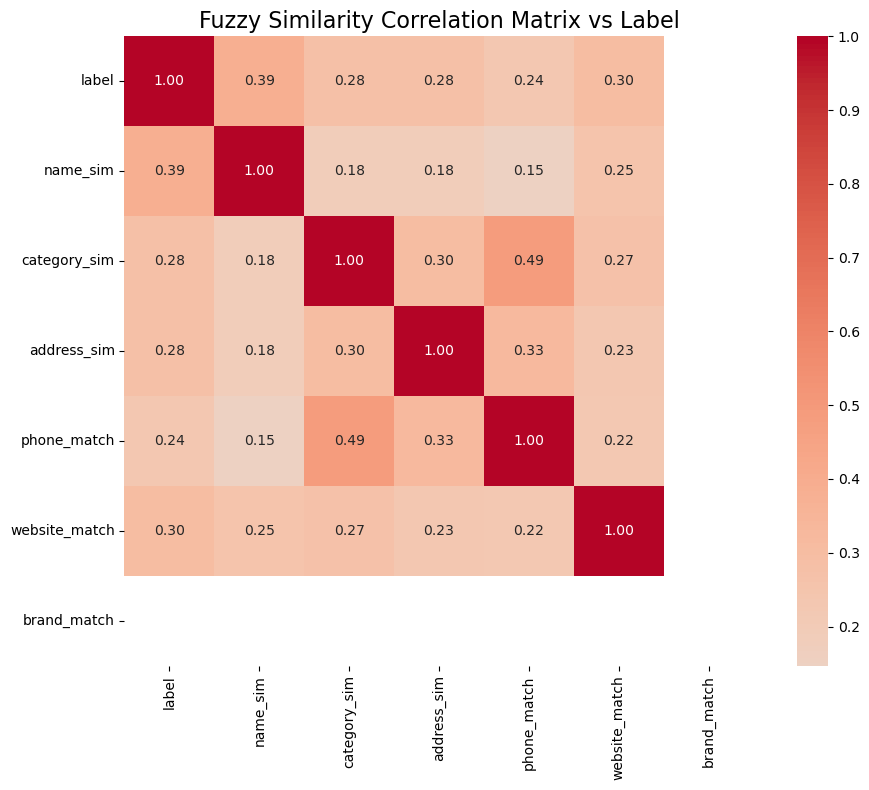

label            1.000000
name_sim         0.385758
website_match    0.302998
address_sim      0.279184
category_sim     0.278274
phone_match      0.236512
brand_match           NaN
Name: label, dtype: float64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rapidfuzz import fuzz
from urllib.parse import urlparse
import json
import re

# ------------------------------------------------
# Load your raw data
# ------------------------------------------------
df = pd.read_parquet("src/data/data.parquet")

# ------------------------------------------------
# Helper functions using YOUR original columns
# ------------------------------------------------

def safe_json_load(x):
    if x is None:
        return None
    try:
        return json.loads(x) if isinstance(x, str) else x
    except Exception:
        return None

def extract_primary(x):
    d = safe_json_load(x)
    if isinstance(d, dict):
        return d.get("primary")
    return None

def address_to_text(a):
    arr = safe_json_load(a)
    if isinstance(arr, list) and len(arr) > 0:
        a0 = arr[0]
        parts = [
            a0.get("freeform", ""),
            a0.get("locality", ""),
            a0.get("postcode", ""),
            a0.get("region", ""),
            a0.get("country", ""),
        ]
        return ", ".join([p for p in parts if p])
    return ""

def normalize_phone(p):
    if p is None:
        return None
    arr = safe_json_load(p)
    if isinstance(arr, list) and arr:
        p = arr[0]
    return re.sub(r"\D", "", p or "")

def extract_domain(urls):
    arr = safe_json_load(urls)
    if isinstance(arr, list) and arr:
        try:
            domain = urlparse(arr[0]).netloc
            return domain.replace("www.", "").lower()
        except Exception:
            return None
    return None

# ------------------------------------------------
# Build fuzzy / binary similarity features
# ------------------------------------------------

df_fuzzy = pd.DataFrame()
df_fuzzy["label"] = df["label"]

# 1) Fuzzy name similarity (primary field)
df_fuzzy["name_sim"] = df.apply(
    lambda r: fuzz.token_set_ratio(
        (extract_primary(r["names"]) or ""),
        (extract_primary(r["base_names"]) or "")
    ) / 100.0,
    axis=1
)

# 2) Fuzzy category similarity (primary)
df_fuzzy["category_sim"] = df.apply(
    lambda r: fuzz.ratio(
        (extract_primary(r["categories"]) or ""),
        (extract_primary(r["base_categories"]) or "")
    ) / 100.0,
    axis=1
)

# 3) Fuzzy address similarity (freeform + locality + etc.)
df_fuzzy["address_sim"] = df.apply(
    lambda r: fuzz.partial_ratio(
        address_to_text(r["addresses"]),
        address_to_text(r["base_addresses"])
    ) / 100.0,
    axis=1
)

# 4) Phone exact-match (binary, but still useful)
df_fuzzy["phone_match"] = df.apply(
    lambda r: 1 if normalize_phone(r["phones"]) and
                 normalize_phone(r["phones"]) == normalize_phone(r["base_phones"])
             else 0,
    axis=1
)

# 5) Website domain match (binary)
df_fuzzy["website_match"] = df.apply(
    lambda r: 1 if extract_domain(r["websites"]) and
                 extract_domain(r["websites"]) == extract_domain(r["base_websites"])
             else 0,
    axis=1
)

# 6) Brand primary match (binary)
df_fuzzy["brand_match"] = df.apply(
    lambda r: 1 if (extract_primary(r["brand"]) or "").lower()
                 == (extract_primary(r["base_brand"]) or "").lower()
             else 0,
    axis=1
)

# ------------------------------------------------
# Correlation matrix vs label
# ------------------------------------------------

corr = df_fuzzy.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True
)
plt.title("Fuzzy Similarity Correlation Matrix vs Label", fontsize=16)
plt.tight_layout()
plt.show()

print(corr["label"].sort_values(ascending=False))


In [2]:
from IPython.display import display

for i, row in df[["addresses", "base_addresses"]].head(5).iterrows():
    print(f"🔹 Row {i}")
    print("addresses:      ", row['addresses'])
    print("base_addresses: ", row['base_addresses'])
    print("-" * 80)

df.head()
import json
print(json.dumps(df.iloc[0].to_dict(), indent=2))


NameError: name 'df' is not defined

In [1]:
import json
print(json.dumps(df.iloc[0].to_dict(), indent=2))


NameError: name 'df' is not defined

In [25]:
def safe_parse(x):
    try:
        return json.loads(x) if isinstance(x, str) else x
    except Exception:
        return None

df["addresses_parsed"] = df["addresses"].apply(safe_parse)
df["base_addresses_parsed"] = df["base_addresses"].apply(safe_parse)

def normalize_json(obj):
    if isinstance(obj, list):
        obj = obj[0] if len(obj) > 0 else {}
    if isinstance(obj, dict):
        return json.dumps(obj, sort_keys=True)
    return str(obj)

df["addr_norm"] = df["addresses_parsed"].apply(normalize_json)
df["base_addr_norm"] = df["base_addresses_parsed"].apply(normalize_json)

df_unique = df[df["addr_norm"] != df["base_addr_norm"]].copy() # drop rows that have the same values 

print(f"Original rows: {len(df)}")
print(f"Remaining rows after dropping matches: {len(df_unique)}")

Original rows: 3000
Remaining rows after dropping matches: 2466


In [21]:
for i, row in df_unique[["addresses", "base_addresses"]].head(10).iterrows():
    print(f"🔹 Row {i}")
    print("addresses:      ", row['addresses'])
    print("base_addresses: ", row['base_addresses'])
    print("-" * 80)


🔹 Row 0
addresses:       [{"freeform":"Avenida Carlos Cano","locality":"Los Barrios","postcode":"11370","country":"ES"}]
base_addresses:  [{"freeform":"Av. Carlos Cano, Glorieta La Montera","locality":"Los Barrios","region":"Cádiz","country":"ES","postcode":"11370"}]
--------------------------------------------------------------------------------
🔹 Row 1
addresses:       [{"freeform":"609 W Maple Ave","locality":"Springdale","postcode":"72764-5335","region":"AR","country":"US"}]
base_addresses:  [{"freeform":"609 W Maple Ave","locality":"Springdale","region":"AR","country":"US","postcode":"72764"}]
--------------------------------------------------------------------------------
🔹 Row 2
addresses:       [{"freeform":"688 9th Ave","locality":"New York","postcode":"10036-3657","region":"NY","country":"US"}]
base_addresses:  [{"freeform":"445 W 45th St","locality":"New York","postcode":"10036-3502","region":"NY","country":"US"}]
-------------------------------------------------------------